![](https://s.24.hu/app/uploads/2021/11/73960334-e1630486201308-1140x641-1-1024x576.jpg)

# Class Házi

A **class** koncepciójának megértéséhez most egy gyakorlatiasabb házit fogtok kapni. A feladat az lesz, hogy **építsetek egy** [**SEIR epidemiológiai modell**](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SEIR_model)-t. A könnyítés kedvéért csak a Person class-t kell nektek megírnotok, de ha érdekel titeket, akkor nyugodtan próbálkozzatok a teljes koncepció megépítésével is.

A házi határideje **november 30. kedd éjfél**!

---


## Segítség

A saját mappátokban a **person.ipynb** fájlban dolgozzatok majd.

A  megadott `Person_own` class-t egészítsétek ki, de hagyjátok meg az eljárások elnevezését és paramétereit, valamint használjátok a lentebb dőlt betűvel leírt elnevezéseket.

Láthatjátok majd hogy milyen eredményt kell kiadjon egy jó megoldás, tehát ellenőrizni is tudjátok majd magatokat.


### Person class leírása

Ez a class egy embert fog reprezentálni. 

Egy ember öt állapotban lehet

- Még nem kapta el - *susceptible*: Ők valamekkora eséllyel el tudják kapni a vírust. Azt hogy mekkora ez a valószínűség, az határozza meg, hogy a társadalomban hányan vannak a fertőző emberek és hogy ők milyen arányban adját tovább a vírust.

- Már elkapta, de még nem jöttek ki a tünetei - *exposed*: Ők elkapták a vírust, de a lappangási idő alatt még nem tudnak fertőzni, valamint nem is halnak meg a betegségben következtében.

- Már elkapta és fertőző - *infected*: Ők a gyógyulási idő alatt fertőzőek a társadalomra nézve, valamint valamekkora eséllyel bele is halhatnak a betegségbe.

- Kigyógyult - *recovered*: Olyan emberek, akik már kijöttek a betegségből és nem is tudják újra elkapni.

- Halott - *dead*: Azok, akik sajnos elhunytak a betegségben.

Gondoljátok át, hogy milyen attribútumokkal fog rendelkezni bármelyik ember (*class attribute*) és egy konkrét személy (*instance attribute*) a fentiek alapján. Figyeljetek arra is, hogy vizsgálni kell azt is, hogy az egyes emberek milyen fertőzöttségi szakaszban vannak.

Figyeljetek oda, hogy egy ember csak egy állapotban lehet. Emiatt érdemes lehet egy olyan függvényt írni, ami a jelenlegi állapottól függően változtat (vagy nem) az adott ember állapotán (*update*).

A fertőzés valószínűségét (*infection_rate*) a társadalom fogja meghatározni, ezért a Person class azt csak paraméterként kapja meg.

In [ ]:
from simulation import *

100%|██████████| 100/100 [00:00<00:00, 927.35it/s]


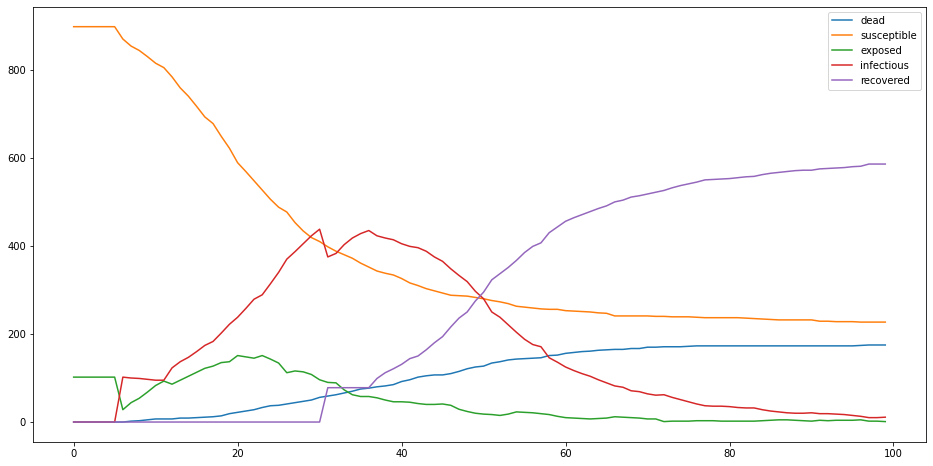

In [ ]:
# Default person attributes:
# death_rate = 0.01
# incubation_days = 5
# recovery_days = 30


simulator = Simulator(start_population=1_000, exposed_rate=0.1)
simulator.simulate(days = 100)

In [ ]:
# write your own person class here
class Person_Katinka:
    death_rate=0.01
    incubation_days=5
    recovery_days=30
    
    def __init__(self, exposed = False):
        self.dead=False
        if exposed:
            self.susceptible=False
            self.exposed=True
        else: 
            self.susceptible=True
            self.exposed=False

        self.infectious=False
        self.recovered=False
        self.since_infected=0
    
    def death(self):
        if np.random.random() < self.death_rate:
            self.dead=True
            self.infectious=False
    
    def infection(self, infection_rate):
        if np.random.random() < infection_rate:
            self.exposed=True
            self.susceptible=False
  
    def incubation(self):
        self.since_infected +=1
        if self.since_infected > self.incubation_days:
            self.infectious=True
            self.exposed=False
    
    def recovery(self):
        self.death()
        self.since_infected+=1
        if not self.dead and self.since_infected>self.recovery_days:
            self.recovered=True
            self.infectious=False
    
    def update(self, infection_rate):
        if self.dead:
            pass
        elif self.susceptible:
            self.infection(infection_rate)
        elif self.exposed:
            self.incubation()
        elif self.infectious:
            self.recovery()

100%|██████████| 100/100 [00:00<00:00, 937.21it/s]


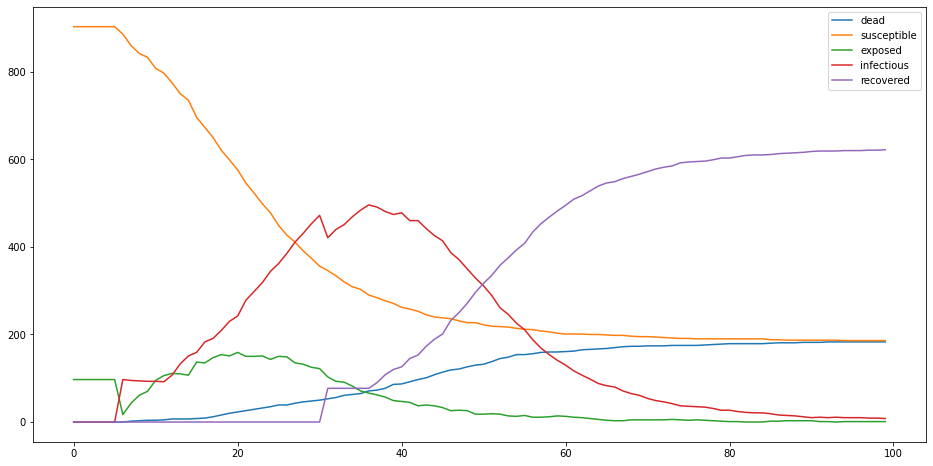

In [ ]:
simulator.simulate(days = 100, person_class=Person_Katinka)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=978e47b7-a961-4dca-a945-499e8b781a34' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>